## Challenge

Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

Submit a link to your models below.

In [66]:
import time
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import os
import warnings 

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

warnings.filterwarnings('ignore')



#start_time = time.time()
#main()
#
#print("--- %s seconds ---" % (time.time() - start_time))

In [62]:
#import Deep Solar Dataset 
deep_solar = pd.read_csv('/Users/robertshiles/CSV_files/deepsolar_tract.csv',encoding= 'latin1')


Target Variable is 

In [61]:
#Examine Null and zero values 
nulldf = pd.DataFrame()
nulldf['nulls'] = deep_solar.isin([np.nan]).sum()
nulldf['zeros'] = deep_solar.isin([0]).sum()
nulldf['%nulls']= deep_solar.isnull().sum()*100/deep_solar.isnull().count()
nulldf['datatype'] = deep_solar.dtypes
nulldf['num_values'] = deep_solar.nunique()
nulldf = nulldf.T


nulldf.head()

,Unnamed: 0,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,education_master,education_population,education_professional_school,employed,gini_index,heating_fuel_coal_coke,heating_fuel_electricity,heating_fuel_fuel_oil_kerosene,heating_fuel_gas,heating_fuel_housing_unit_count,heating_fuel_none,heating_fuel_other,heating_fuel_solar,land_area,per_capita_income,population,population_density,poverty_family_below_poverty_level,poverty_family_count,race_asian,race_black_africa,race_indian_alaska,race_islander,race_other,race_two_more,race_white,state,total_area,unemployed,water_area,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_indian_alaska_rate,race_asian_rate,race_islander_rate,race_other_rate,race_two_more_rate,employ_rate,poverty_family_below_poverty_level_rate,heating_fuel_gas_rate,heating_fuel_electricity_rate,heating_fuel_fuel_oil_kerosene_rate,heating_fuel_coal_coke_rate,heating_fuel_solar_rate,heating_fuel_other_rate,heating_fuel_none_rate,solar_panel_area_divided_by_area,solar_panel_area_per_capita,tile_count_residential,tile_count_nonresidential,solar_system_count_residential,solar_system_count_nonresidential,total_panel_area_residential,total_panel_area_nonresidential,median_household_income,electricity_price_residential,electricity_price_commercial,electricity_price_industrial,electricity_price_transportation,electricity_price_overall,electricity_consume_residential,electricity_consume_commercial,electricity_consume_industrial,electricity_consume_total,household_count,average_household_size,housing_unit_count,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,lat,lon,elevation,heating_design_temperature,cooling_design_temperature,earth_temperature_amplitude,frost_days,air_temperature,relative_humidity,daily_solar_radiation,atmospheric_pressure,wind_speed,earth_temperature,heating_degree_days,cooling_degree_days,age_18_24_rate,age_25_34_rate,age_more_than_85_rate,age_75_84_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,age_15_17_rate,age_5_9_rate,household_type_family_rate,dropout_16_19_inschool_rate,occupation_construction_rate,occupation_public_rate,occupation_information_rate,occupation_finance_rate,occupation_education_rate,occupation_administrative_rate,occupation_manufacturing_rate,occupation_wholesale_rate,occupation_retail_rate,occupation_transportation_rate,occupation_arts_rate,occupation_agriculture_rate,occupancy_vacant_rate,occupancy_owner_rate,mortgage_with_rate,transportation_home_rate,transportation_car_alone_rate,transportation_walk_rate,transportation_carpool_rate,transportation_motorcycle_rate,transportation_bicycle_rate,transportation_public_rate,travel_time_less_than_10_rate,travel_time_10_19_rate,travel_time_20_29_rate,travel_time_30_39_rate,travel_time_40_59_rate,travel_time_60_89_rate,health_insurance_public_rate,health_insurance_none_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2016_dem_win,voting_2012_dem_percentage,voting_2012_gop_percentage,voting_2012_dem_win,number_of_years_of_education,diversity,number_of_solar_system_per_household,incentive_count_residential,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
nulls,0,0,0,0,0,886,0,0,0,0,0,0,0,0,0,0,847,0,0,0,0,0,0,0,0,24,643,0,316,0,0,0,0,0,0,0,0,0,0,24,0,24,607,607,607,607,607,607,607,597,597,597,597,597,597,597,706,823,771,771,771,771,771,771,771,24,463,0,0,0,0,0,0,957,0,0,0,0,0,0,0,0,0,0,808,0,0,1894,1976,5802,5802,5802,5802,58

In [69]:
deep_solar.select_dtypes(include=['object']).columns.tolist()

['county', 'state', 'electricity_price_transportation']

In [65]:
# Data Cleaning here

deep_solar.dropna()


,Unnamed: 0,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,education_master,education_population,education_professional_school,employed,gini_index,heating_fuel_coal_coke,heating_fuel_electricity,heating_fuel_fuel_oil_kerosene,heating_fuel_gas,heating_fuel_housing_unit_count,heating_fuel_none,heating_fuel_other,heating_fuel_solar,land_area,per_capita_income,population,population_density,poverty_family_below_poverty_level,poverty_family_count,race_asian,race_black_africa,race_indian_alaska,race_islander,race_other,race_two_more,race_white,state,total_area,unemployed,water_area,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_indian_alaska_rate,race_asian_rate,race_islander_rate,race_other_rate,race_two_more_rate,employ_rate,poverty_family_below_poverty_level_rate,heating_fuel_gas_rate,heating_fuel_electricity_rate,heating_fuel_fuel_oil_kerosene_rate,heating_fuel_coal_coke_rate,heating_fuel_solar_rate,heating_fuel_other_rate,heating_fuel_none_rate,solar_panel_area_divided_by_area,solar_panel_area_per_capita,tile_count_residential,tile_count_nonresidential,solar_system_count_residential,solar_system_count_nonresidential,total_panel_area_residential,total_panel_area_nonresidential,median_household_income,electricity_price_residential,electricity_price_commercial,electricity_price_industrial,electricity_price_transportation,electricity_price_overall,electricity_consume_residential,electricity_consume_commercial,electricity_consume_industrial,electricity_consume_total,household_count,average_household_size,housing_unit_count,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,lat,lon,elevation,heating_design_temperature,cooling_design_temperature,earth_temperature_amplitude,frost_days,air_temperature,relative_humidity,daily_solar_radiation,atmospheric_pressure,wind_speed,earth_temperature,heating_degree_days,cooling_degree_days,age_18_24_rate,age_25_34_rate,age_more_than_85_rate,age_75_84_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,age_15_17_rate,age_5_9_rate,household_type_family_rate,dropout_16_19_inschool_rate,occupation_construction_rate,occupation_public_rate,occupation_information_rate,occupation_finance_rate,occupation_education_rate,occupation_administrative_rate,occupation_manufacturing_rate,occupation_wholesale_rate,occupation_retail_rate,occupation_transportation_rate,occupation_arts_rate,occupation_agriculture_rate,occupancy_vacant_rate,occupancy_owner_rate,mortgage_with_rate,transportation_home_rate,transportation_car_alone_rate,transportation_walk_rate,transportation_carpool_rate,transportation_motorcycle_rate,transportation_bicycle_rate,transportation_public_rate,travel_time_less_than_10_rate,travel_time_10_19_rate,travel_time_20_29_rate,travel_time_30_39_rate,travel_time_40_59_rate,travel_time_60_89_rate,health_insurance_public_rate,health_insurance_none_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2016_dem_win,voting_2012_dem_percentage,voting_2012_gop_percentage,voting_2012_dem_win,number_of_years_of_education,diversity,number_of_solar_system_per_household,incentive_count_residential,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,0,0.0,0.0,0.000000,27145011200,70352.789869,Stearns County,569,1690,13,1757,336,157,4548,26,3569,0.3490,200,448,98,1720,2527,10,51,0,147.731200,26999.0,6577,44.520050,85,1911,28,19,16,0,6,88,6420,mn,154.371900,136,6.640769,0.073879,0.386324,0.371592,0.125110,0.034521,0.0057

In [86]:
#find useful variables with the random forrest classifier

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

#'grade','verification_status','last_pymnt_d','verification_status_joint','total_il_high_credit_limit'

X = deep_solar.drop(columns =['county','state'])
X = pd.get_dummies(X)
X = X.dropna(axis=1)

Y = deep_solar['state']

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [88]:
#from sklearn import ensemble
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(ensemble.RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [89]:
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

25
Index(['fips', 'electricity_price_residential', 'electricity_price_commercial', 'electricity_price_industrial', 'electricity_price_overall', 'electricity_consume_residential', 'electricity_consume_commercial', 'electricity_consume_industrial', 'electricity_consume_total', 'incentive_count_residential', 'incentive_count_nonresidential', 'incentive_residential_state_level', 'incentive_nonresidential_state_level', 'net_metering', 'feedin_tariff', 'property_tax', 'sales_tax', 'rebate', 'avg_electricity_retail_rate', 'electricity_price_transportation_11.44', 'electricity_price_transportation_6.81', 'electricity_price_transportation_7.69', 'electricity_price_transportation_7.82', 'electricity_price_transportation_8.92', 'electricity_price_transportation_8.99'], dtype='object')


# Build models 

### Data for Model Construction 

In [119]:
#test variables on classifier
rfc = ensemble.RandomForestClassifier()


I = deep_solar[['incentive_count_nonresidential','rebate','incentive_residential_state_level']]
I = pd.get_dummies(I)
I = I.dropna(axis=1)
#'last_pymnt_d',, 'last_pymnt_amnt'
J = deep_solar['state']




In [120]:
from sklearn.model_selection import train_test_split

I_train, I_test, J_train, J_test = train_test_split(I, J, test_size=0.2, random_state=42)


### Create Random Forrest Model 

In [115]:
start_time = time.time()

score=cross_val_score(rfc, I_train, J_train, cv=10)
print(score)
#type(score[1])

print("--- %s seconds ---" % (time.time() - start_time))

[0.91464881 0.91457546 0.91453138 0.91467401 0.91460055 0.91465517
 0.9148129  0.91468048 0.91476487 0.91486416]
--- 3.3786277770996094 seconds ---


In [122]:
rfc.fit( I_train, J_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
rfc.predict( I_test, J_test,)

TypeError: predict() takes 2 positional arguments but 3 were given

### Build Single Tree Modle 

In [128]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz



[0.91464881 0.91457546 0.91453138 0.91467401 0.91460055 0.91465517
 0.9148129  0.91468048 0.91476487 0.91486416]
--- 2.230069875717163 seconds ---


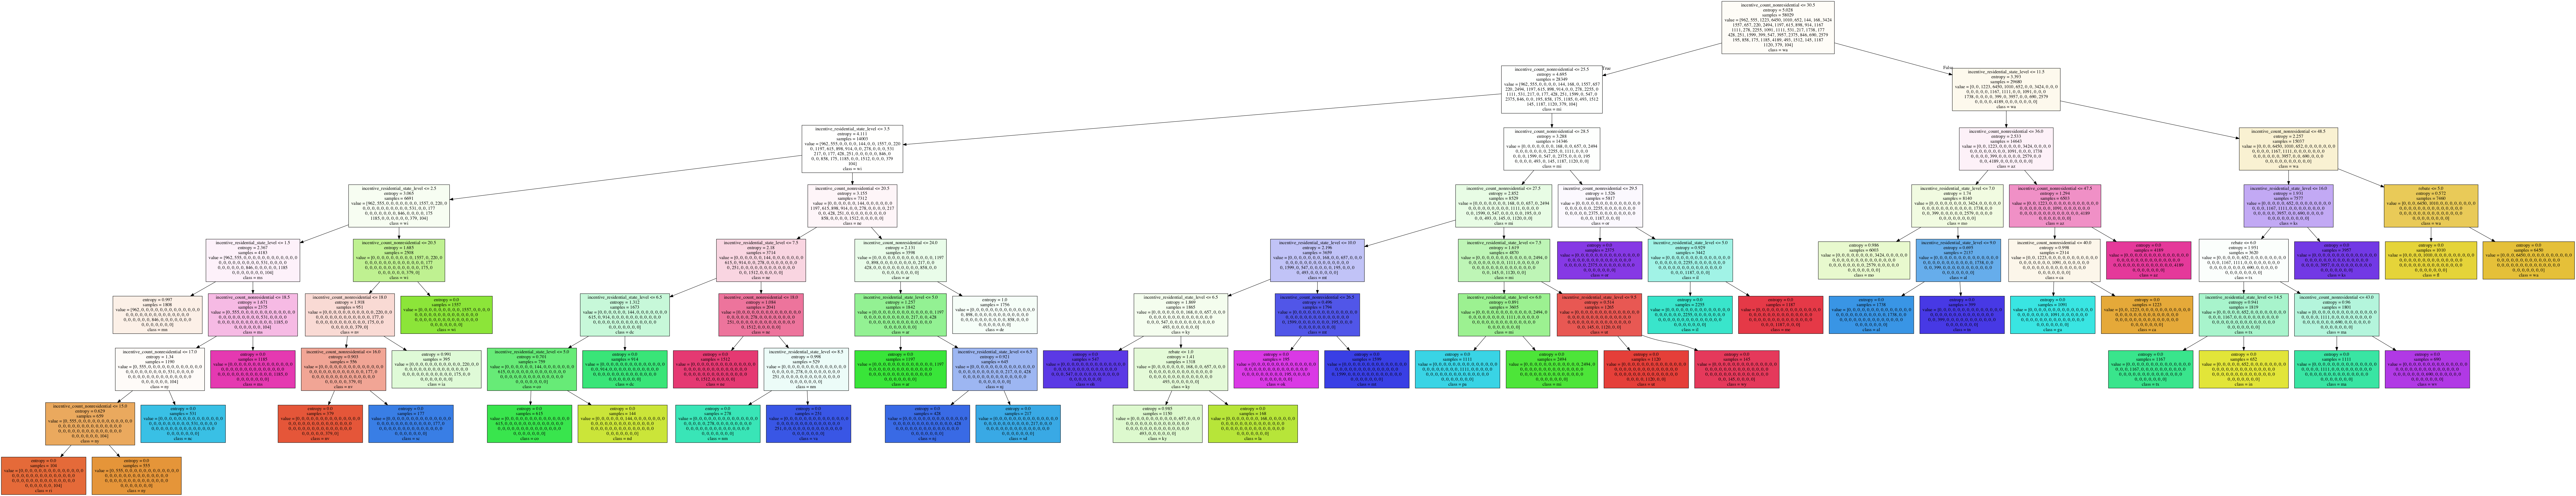

In [131]:
# Initialize and train our tree.


decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=3,
    max_depth=8,
    random_state = 1337
)
start_time = time.time()

score=cross_val_score(decision_tree, I_train, J_train, cv=10)
print(score)
decision_tree.fit(I_train, J_train)
print("--- %s seconds ---" % (time.time() - start_time))

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=I.columns,
    class_names=['mn', 'ny', 'ca', 'wa', 'fl', 'in', 'nd', 'la', 'mo', 'wi', 'ky',
       'ia', 'mi', 'ar', 'co', 'de', 'dc', 'tx', 'ma', 'nm', 'il', 'ga',
       'pa', 'nc', 'sd', 'al', 'sc', 'nj', 'va', 'mt', 'tn', 'oh', 'ks',
       'or', 'nh', 'wv', 'id', 'ok', 'ct', 'md', 'ms', 'az', 'vt', 'ne',
       'wy', 'me', 'ut', 'nv', 'ri'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


## Conclusions 
the decision tree  is a slightly faster  method of clustering. this makes sense in that a forrest must run a tree multile times. 